# Using SCOTCH to integarte single-cell RNA-seq and ATAC-seq data of human kidney
***Muto-2021***

## Import required python packages

In [1]:
import pandas as pd
import anndata as ad
import scanpy as sc
import numpy as np
from scotch import *

## Load datasets

In [2]:
rna = load_data("/slurm/home/yrd/fanlab/yangpenghui/SCOTCH/data/Muto-2021/rna.h5ad")
tmp = load_data("/slurm/home/yrd/fanlab/yangpenghui/SCOTCH/data/Muto-2021/rna_test.h5ad")
rna.obs['seurat_clusters'] = tmp.obs['seurat_clusters'].astype(str)
rna.obsm = tmp.obsm

atac = load_data("/slurm/home/yrd/fanlab/yangpenghui/SCOTCH/data/Muto-2021/atac.h5ad")
tmp = load_data("/slurm/home/yrd/fanlab/yangpenghui/SCOTCH/data/Muto-2021/atac_test.h5ad")
atac.obs['seurat_clusters'] = tmp.obs['seurat_clusters'].astype(str)
atac.obsm = tmp.obsm

gam = load_data("/slurm/home/yrd/fanlab/yangpenghui/SCOTCH/data/Muto-2021/gam.h5ad")
gam = gam[atac.obs.index]

## Process datasets
Use the low-dimensional embedding representation of the original data, the umap dimensionality reduction results and cluster information for subsequent integration

### Process scRNA-seq dataset

Processing RNA data...
Identifying highly variable genes...
Normalizing total counts...
Applying log1p transformation...
Saving pre-log1p counts to a layer...
Scaling the data...


... storing 'seurat_clusters' as categorical


Processing completed.


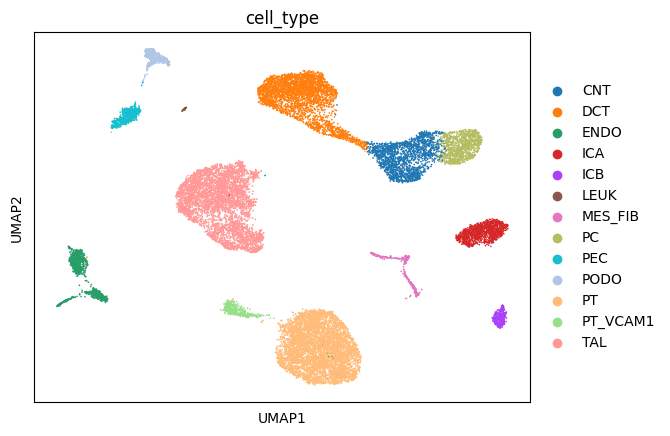

In [3]:
# Processing
rna = process_anndata(rna,pca=False,neighbors=False,umap=False)
sc.pl.umap(rna, color="cell_type")

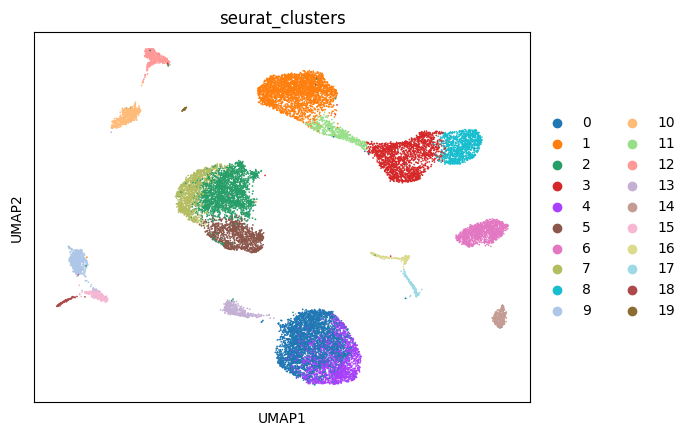

In [4]:
sc.pl.umap(rna, color="seurat_clusters")

### Process scATAC-seq dataset

... storing 'seurat_clusters' as categorical


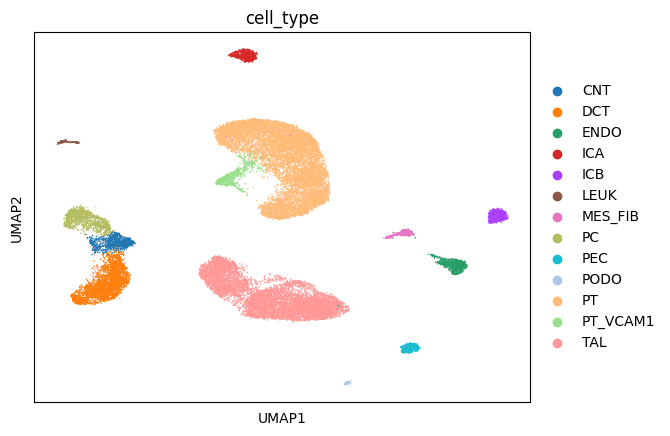

In [5]:
sc.pl.umap(atac, color="cell_type")

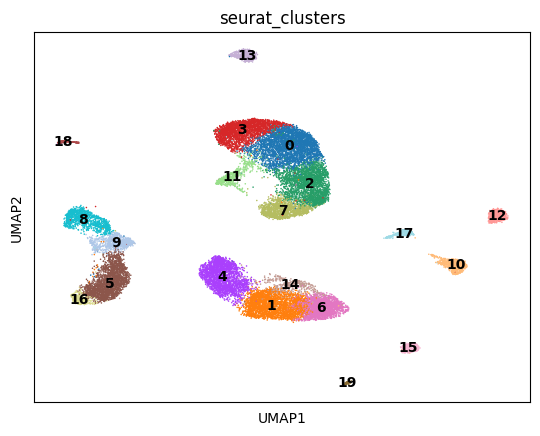

In [6]:
sc.pl.umap(atac, color="seurat_clusters",legend_loc="on data")

### Process scATAC-seq dataset (gene activity score)

Trying to set attribute `.obs` of view, copying.


Processing RNA data...
Identifying highly variable genes...
Normalizing total counts...
Applying log1p transformation...
Saving pre-log1p counts to a layer...
Scaling the data...
Performing PCA...


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Calculating neighbors based on cosine metric...


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Performing UMAP...
Processing completed.


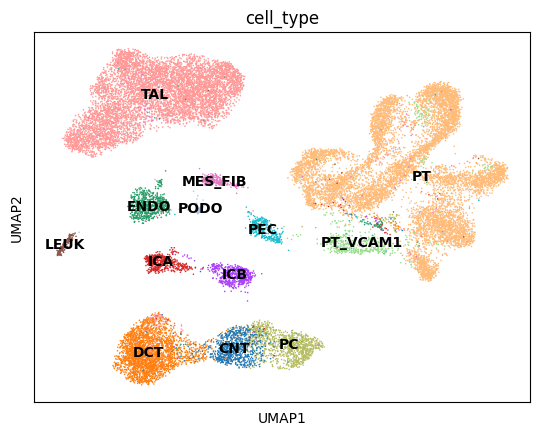

In [7]:
gam.obs['seurat_clusters'] = atac.obs['seurat_clusters']
gam.obs['cell_type'] = atac.obs['cell_type']

gam = process_anndata(gam)
sc.pl.umap(gam,legend_loc="on data",color='cell_type')

In [ ]:
# Store low-dimensional embedding representation for subsequent calls
rna.obsm['reduction'] = rna.obsm['X_harmony']
gam.obsm['reduction'] = atac.obsm['X_harmony']

## Transfer labels

In [9]:
# Calculate marker genes
adata1,adata2 = find_marker(rna,gam,min_cells=0,top_marker_num=10,marker1_by="seurat_clusters",marker2_by="seurat_clusters")

Finding marker genes...
Number of common genes: 16281


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
Trying to set attribute `.uns` of view, copying.


Calculating marker genes based on 'seurat_clusters' for adata1...


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_

Calculating marker genes based on 'seurat_clusters' for adata2...
Marker gene calculation completed.


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/scanpy/tools/_

/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Performing label transfer...
Calculating average expression...


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Computing correlation matrix...
Performing unbalanced optimal transport...
Applying cutoff to transfer probabilities and mapping labels...


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
Trying to set attribute `.obs` of view, copying.


Label transfer completed.


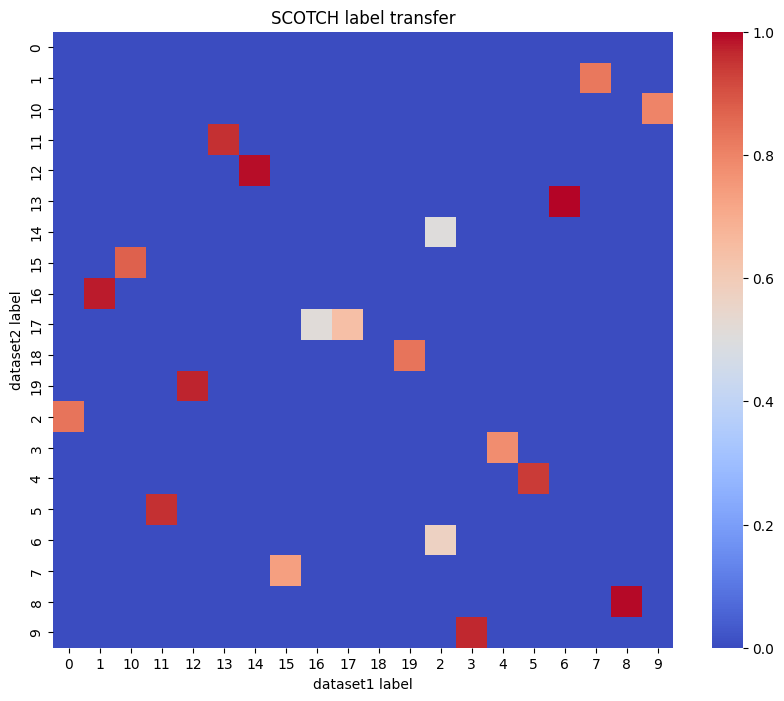

In [10]:
adata1, adata2, transfer_df = scotch_transfer( test_data = adata1,reference_data = adata2,test_avg_by='seurat_clusters',reference_avg_by='seurat_clusters',reg=1,cutoff = 0.5)
plot_heatmap(transfer_df)

## Cell alignment calculates matching relationships

In [12]:
adata1, adata2 = intersect_datasets(data1 = adata1, data2 = adata2)

/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


In [13]:
result = scotch_alignment(adata1, adata2)

Performing SCOTCH alignment...
Processing cell type 1/18: 8
mass : 0.930783242258652
Constructing connectivity...
k = 10
Running OT...
Processing cell type 2/18: 2


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


mass : 0.7236043689320388
Constructing connectivity...
k = 10
Running OT...
Processing cell type 3/18: 1
mass : 0.38310060866451845
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 4/18: 6
mass : 0.7844905320108205
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 5/18: 5
mass : 0.22277904328018222
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 6/18: 16
mass : 0.131836291198841
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 7/18: 4
mass : 0.5075221238938054


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Constructing connectivity...
k = 10
Running OT...
Processing cell type 8/18: 13
mass : 0.4823848238482385
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 9/18: 12
mass : 0.6403669724770642
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 10/18: 15
mass : 0.6521739130434783
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 11/18: 9
mass : 0.4470914127423823
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 12/18: 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


mass : 0.8214285714285714
Constructing connectivity...
k = 10
Running OT...
Processing cell type 13/18: 17
mass : 0.726457399103139
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 14/18: 3
mass : 0.771960958296362
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 15/18: 19
mass : 0.2224622030237581
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 16/18: 7
mass : 0.21638330757341576
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 17/18: 11
mass : 0.7822299651567944
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
Processing cell type 18/18: 18
mass : 0.35795454545454547
Constructing connectivity...
k = 10


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


Running OT...
SCOTCH alignment completed.


In [14]:
(result["cell_type1"].astype('object') == result["cell_type2"].astype('object')).sum()/len(result)

0.9858717960956518

## Data integration using matching relationships

Integrating and concatenating AnnData objects...


/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/slurm/home/yrd/fanlab/yangpenghui/anaconda3/envs/yph/lib/python3.8/site-packages/anndata/_core/merge.py:891: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


Integration and concatenation completed.


... storing 'is_primary_data' as categorical
... storing 'seurat_clusters' as categorical
... storing 'annotation' as categorical


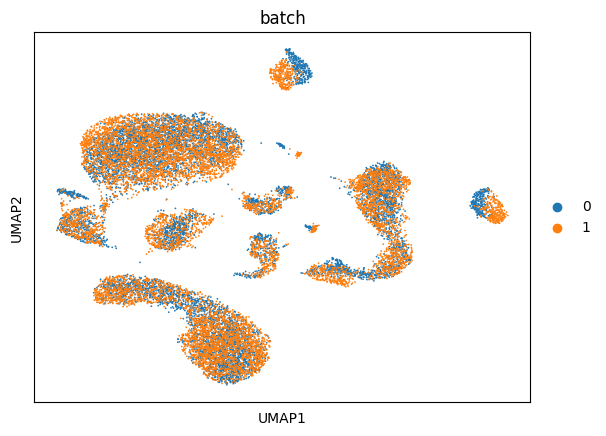

In [15]:
adata1, adata2, adata_integrated = integrate_adata(adata1=adata1, adata2=adata2, df=result, n_components = 30, max_iter = 1000,cca_components = 10)
sc.pp.neighbors(adata_integrated, use_rep="integrated", metric="cosine")
sc.tl.umap(adata_integrated)
sc.pl.umap(adata_integrated, color="batch")